In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.colors as colors

In [2]:
snr = np.loadtxt("MM_datafiles/snr_list.txt")
mass = np.loadtxt("MM_datafiles/mass_list.txt")

In [3]:
df = pd.DataFrame(np.array([snr,mass]).T,columns=["snr","mass"])

<AxesSubplot:xlabel='mass', ylabel='snr'>

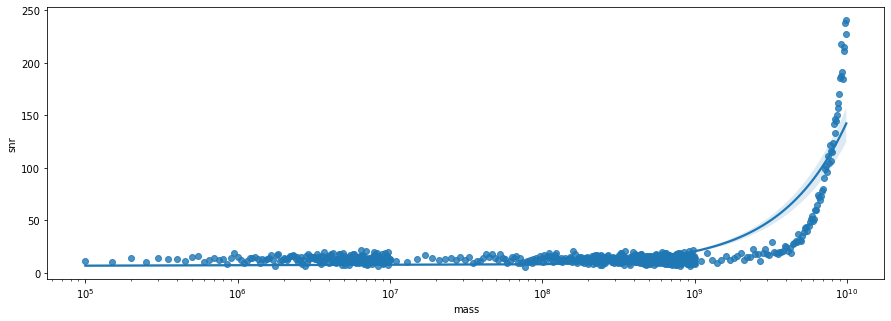

In [4]:
f, ax = plt.subplots(figsize=(15, 5))
ax.set(xscale="log")

sns.regplot(x=df.mass,y=df.snr,ax=ax)

<AxesSubplot:xlabel='mass', ylabel='snr'>

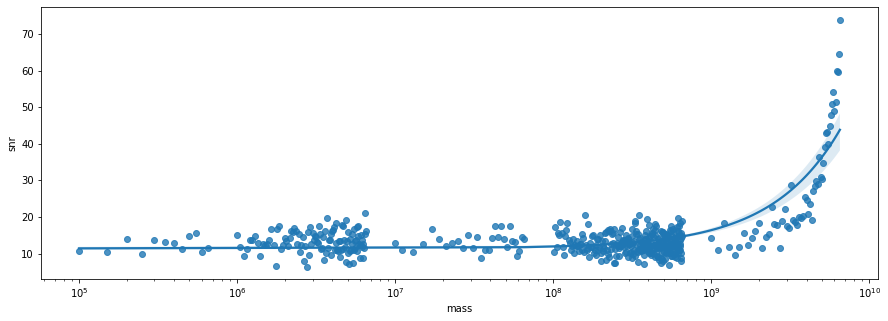

In [5]:
f, ax = plt.subplots(figsize=(15, 5))
ax.set(xscale="log")

sns.regplot(x=df.mass[:-300],y=df.snr[:-300],ax=ax)

In [6]:
trial_file = "/fred/oz002/users/mmiles/VIPER_SummerSchool/results_varyMass/mass_695000000/data_hd_1.75_5.0_695000000.0_60.0_2e-08"

In [7]:
ddf = pd.read_pickle(trial_file)
ddf = ddf.sort_values("xi")

<AxesSubplot:xlabel='xi', ylabel='rho'>

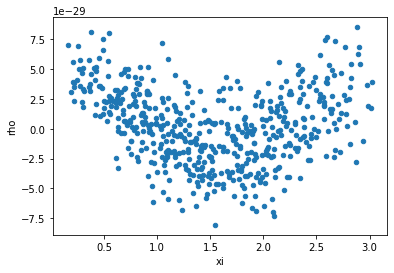

In [8]:
ddf.plot("xi","rho",kind="scatter")

In [91]:
len(ddf)

528

In [10]:
np.arange(len(ddf))//round(0.1*len(ddf))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [11]:
moving_ave = ddf.groupby(np.arange(len(ddf))//round(0.1*len(ddf))).mean()


<AxesSubplot:xlabel='xi', ylabel='rho'>

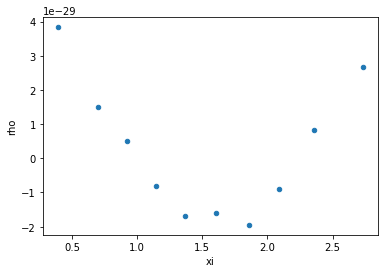

In [12]:
moving_ave.plot("xi","rho", kind="scatter")

In [13]:

def HandD(x):
    c = (1-np.cos(x))/2
    return (1/2) - (1/4)*c+ (3/2)*c*np.log(c)

def Dipole(x):
    return np.cos(x)

def Monopole(x):
    return 1 + 0*x

def plotBinnedCrossCor(xi,rho,sig,bins=13):
    temp = np.arange(0,len(xi),len(xi)/bins,dtype=np.int16)
    ranges = np.zeros(bins+1)
    ranges[0:bins]=temp
    ranges[bins]=len(xi)
    
    xiAvg = np.zeros(bins)
    rhoAvg = np.zeros(bins)
    sigmaComb = np.zeros(bins)
    
    #Need to sort by pulsar separation
    sortMask = np.argsort(xi)
    
    for i in range(bins):
        #Mask and select range of values to average
        subXi = xi[sortMask]
        subXi = subXi[int(ranges[i]):int(ranges[i+1])]
        subRho = rho[sortMask]
        subRho = subRho[int(ranges[i]):int(ranges[i+1])]
        subSig = sig[sortMask]
        subSig = subSig[int(ranges[i]):int(ranges[i+1])]
        
        #Useful to not type this out every time
        subSigSquare = np.square(subSig)
        
        #Average the separations, no weighting
        xiAvg[i] = np.average(subXi)
        
        #Average the correlated amplitude, with weighting
        rhoAvg[i] = np.sum(subRho/subSigSquare)/np.sum(1/subSigSquare)
        
        #Averaging the uncertanties
        sigmaComb[i] = 1/np.sqrt(np.sum(1/subSigSquare))
        
    return xiAvg, rhoAvg, sigmaComb

In [14]:
datadirdir = "/fred/oz002/users/mmiles/VIPER_SummerSchool/results_varyMass"

In [83]:
master_df = []
movave_df = []

for result in glob.glob(datadirdir+"/mass*/data*"):
    dftemp = pd.read_pickle(result)
    mass = result.split("/")
    mass = int(mass[-2].split("_")[-1])
    dftemp["mass"] = [mass]*len(dftemp)
    
    dftemp = dftemp.sort_values("xi")
    
    #moving_ave = dftemp.groupby(np.arange(len(dftemp))//round(0.1*len(dftemp))).mean()
    avexi, averho, avesig = plotBinnedCrossCor(dftemp.xi,dftemp.rho,dftemp.sig)
    avedata = [avexi,averho,avesig]
    avedata = np.array(avedata)
    
    moving_ave = pd.DataFrame(avedata.T,columns=["xi","rho","sig"])
    moving_ave["mass"] = [mass]*len(moving_ave)
    moving_ave = moving_ave.sort_values("xi")
    
    master_df.append(dftemp)
    movave_df.append(moving_ave)
    
mass_df = pd.concat(master_df)
mass_ave_df = pd.concat(movave_df)
    

In [16]:
avexi, averho, avesig = plotBinnedCrossCor(dftemp.xi,dftemp.rho,dftemp.sig)

In [17]:
mass_ave_df


,xi,rho,sig,mass
12,0.787633,5.778445e-30,3.850608e-30,3400000
11,0.869195,3.576208e-30,4.216042e-30,3400000
10,1.002195,4.626833e-31,4.214974e-30,3400000
9,1.057047,4.184958e-30,4.215662e-30,3400000
8,1.394091,1.738045e-30,4.214898e-30,3400000
...,...,...,...,...
3,1.845104,6.257868e-30,4.222205e-30,51000000
5,1.895109,4.447366e-30,4.249344e-30,51000000
4,1.942647,2.320235e-30,4.218529e-30,51000000
6,1.962052,2.311609e-30,4.254359e-30,51000000


In [18]:
mass_df = mass_df.reset_index(drop=True)
mass_df

,xi,rho,sig,mass
0,0.155869,8.632469e-29,2.665323e-29,3400000
1,0.182969,5.032068e-29,2.793304e-29,3400000
2,0.200630,3.316333e-29,2.665408e-29,3400000
3,0.209017,2.011563e-29,2.664567e-29,3400000
4,0.213037,5.384589e-30,2.664641e-29,3400000
...,...,...,...,...
418699,2.937913,5.704059e-30,2.875795e-29,51000000
418700,2.977068,5.495467e-29,2.710320e-29,51000000
418701,2.981286,-1.137660e-29,2.664601e-29,51000000
418702,3.011413,4.498226e-29,2.664728e-29,51000000


In [19]:
mass_ave_df = mass_ave_df.reset_index(drop=True)
#mass_ave_df['mass'] = mass_ave_df['mass'].map(lambda x: str(x))
mass_ave_df

,xi,rho,sig,mass
0,0.787633,5.778445e-30,3.850608e-30,3400000
1,0.869195,3.576208e-30,4.216042e-30,3400000
2,1.002195,4.626833e-31,4.214974e-30,3400000
3,1.057047,4.184958e-30,4.215662e-30,3400000
4,1.394091,1.738045e-30,4.214898e-30,3400000
...,...,...,...,...
10304,1.845104,6.257868e-30,4.222205e-30,51000000
10305,1.895109,4.447366e-30,4.249344e-30,51000000
10306,1.942647,2.320235e-30,4.218529e-30,51000000
10307,1.962052,2.311609e-30,4.254359e-30,51000000


<AxesSubplot:xlabel='xi', ylabel='rho'>

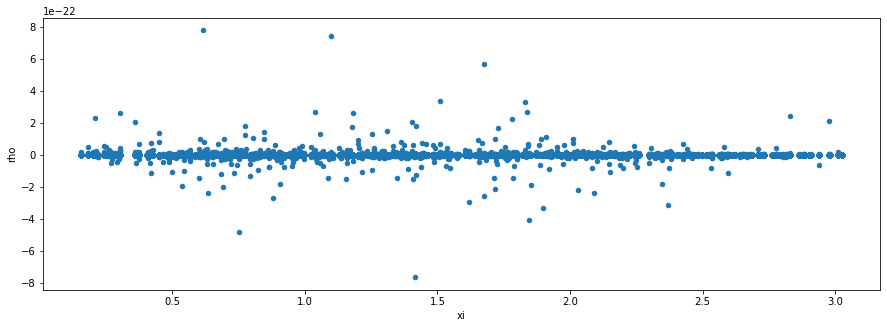

In [20]:
mass_df.plot("xi","rho",kind="scatter",figsize=(15,5))

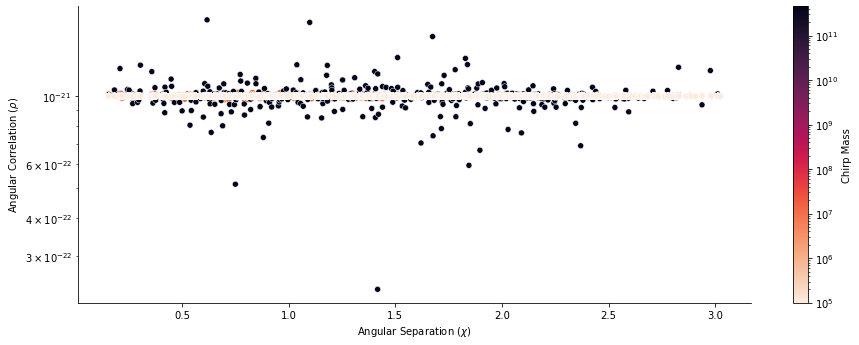

In [59]:
g = sns.relplot(data=mass_df, x='xi', y=mass_df_rescaled, hue='mass', aspect=2.5,legend=False,palette="rocket_r")
g.set(yscale="log")
#norm = plt.colors.LogNorm(mass_df["mass"].min(), mass_df["mass"].max())
sm = plt.cm.ScalarMappable(cmap="rocket_r",norm=colors.LogNorm(mass_df["mass"].min(), mass_df["mass"].max()))
sm.set_array([])
#g.get_legend().remove()
cbar = g.figure.colorbar(sm)
cbar.set_label("Chirp Mass")
g.set_ylabels(r"Angular Correlation ($\rho$)")
g.set_xlabels(r"Angular Separation ($\chi$)")

plt.show()

In [66]:
i=5
using = mass_df_rescaled[10**(i-1) < mass_df_rescaled["mass"] < 10**(i)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [82]:
mass_df

,xi,rho,sig,mass
0,0.155869,1.000000e-21,2.665323e-29,3400000
1,0.182969,1.000000e-21,2.793304e-29,3400000
2,0.200630,1.000000e-21,2.665408e-29,3400000
3,0.209017,1.000000e-21,2.664567e-29,3400000
4,0.213037,1.000000e-21,2.664641e-29,3400000
...,...,...,...,...
418699,2.937913,1.000000e-21,2.875795e-29,51000000
418700,2.977068,1.000000e-21,2.710320e-29,51000000
418701,2.981286,1.000000e-21,2.664601e-29,51000000
418702,3.011413,1.000000e-21,2.664728e-29,51000000


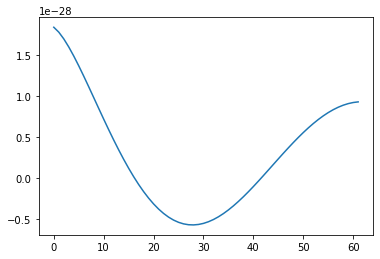

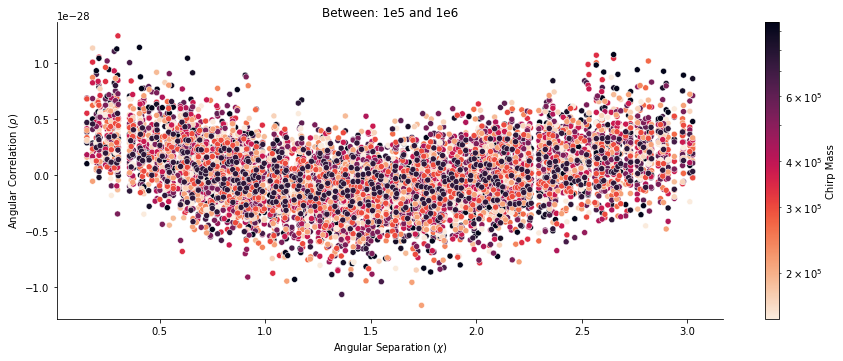

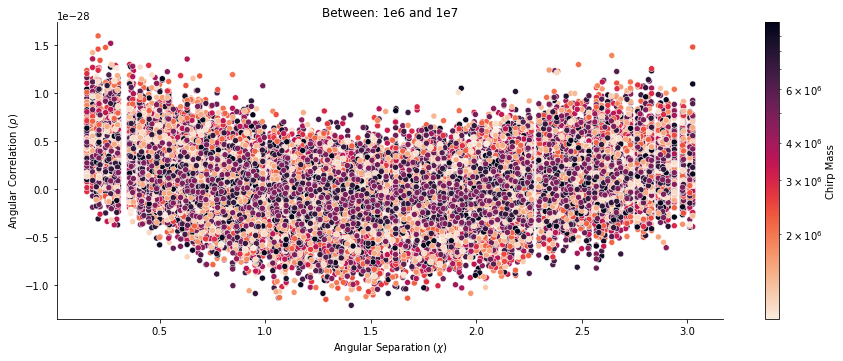

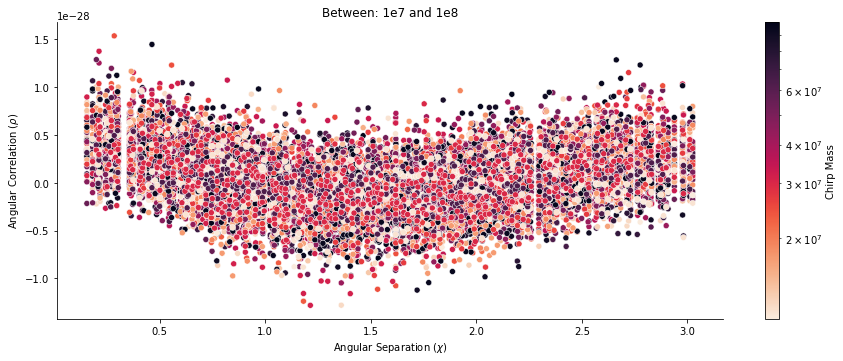

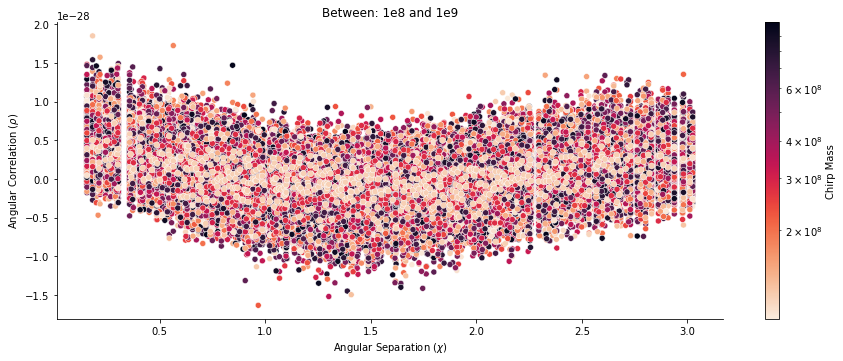

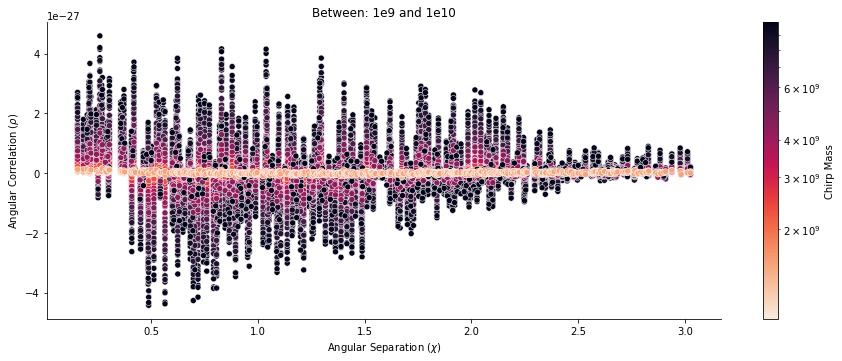

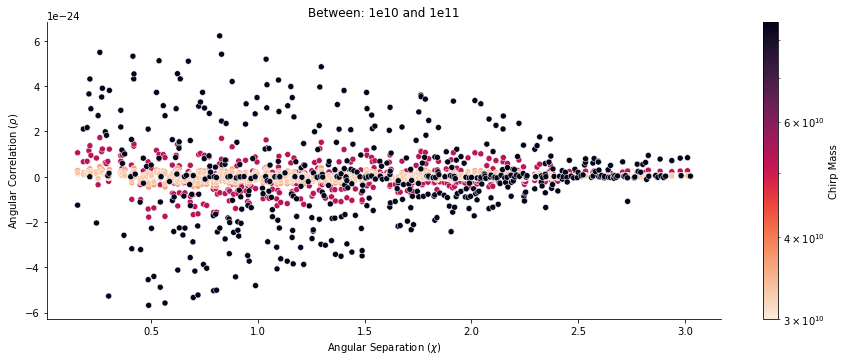

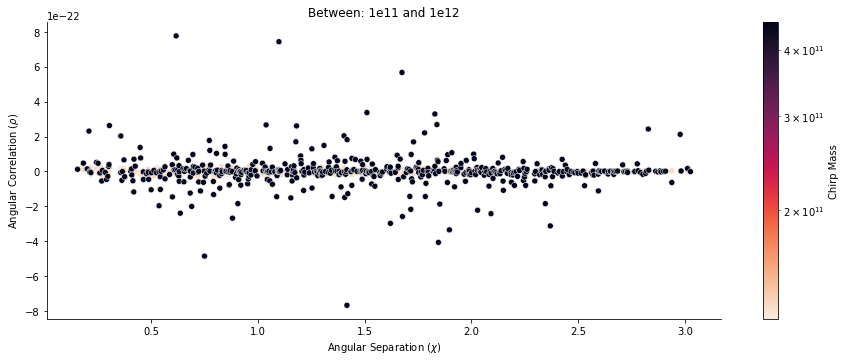

In [103]:
i=5
while i < 12:
    i = i+1
    using = mass_df[mass_df["mass"] < 10**i]
    using = using[using["mass"] > 10**(i-1)]
    
    g = sns.relplot(data=using, x='xi', y="rho", hue='mass', aspect=2.5,legend=False,palette="rocket_r")
    #g.set(yscale="log")
    #norm = plt.colors.LogNorm(mass_df["mass"].min(), mass_df["mass"].max())
    sm = plt.cm.ScalarMappable(cmap="rocket_r",norm=colors.LogNorm(using["mass"].min(), using["mass"].max()))
    sm.set_array([])
    #g.get_legend().remove()
    cbar = g.figure.colorbar(sm)
    cbar.set_label("Chirp Mass")
    g.set_ylabels(r"Angular Correlation ($\rho$)")
    g.set_xlabels(r"Angular Separation ($\chi$)")
    #plt.plot(using.rho.median()*HandD(np.arange(0.05,np.pi,.05)))
    plt.title("Between: 1e{} and 1e{}".format(i-1,i))

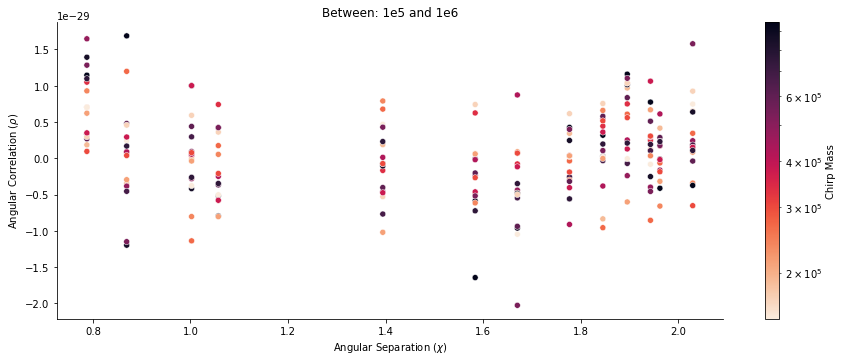

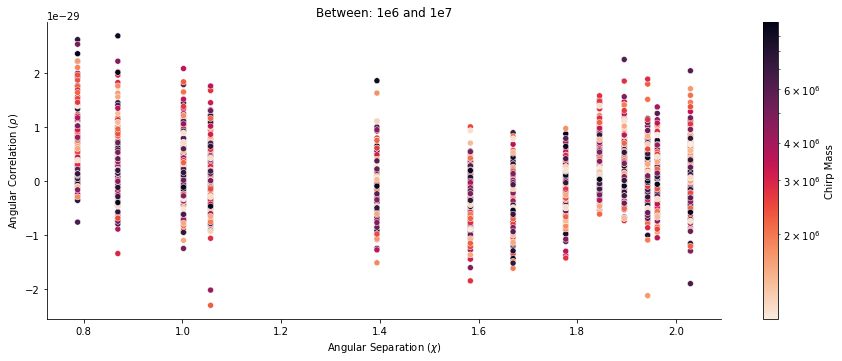

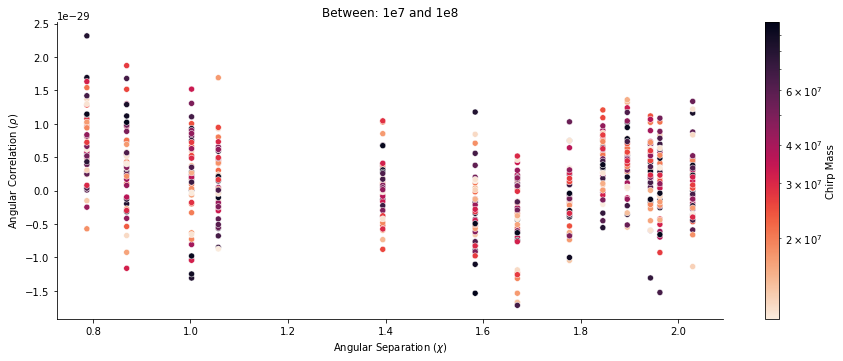

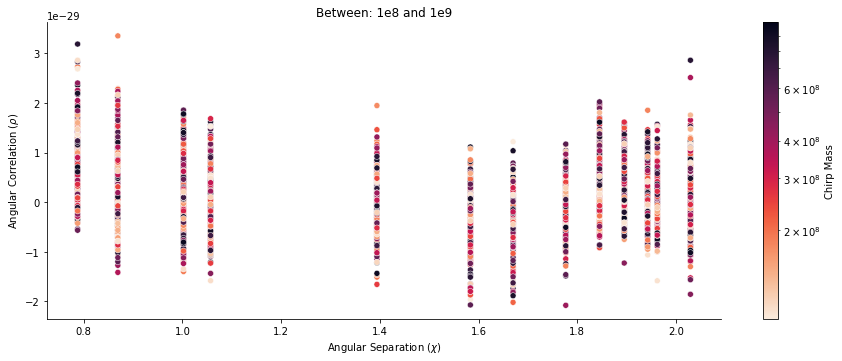

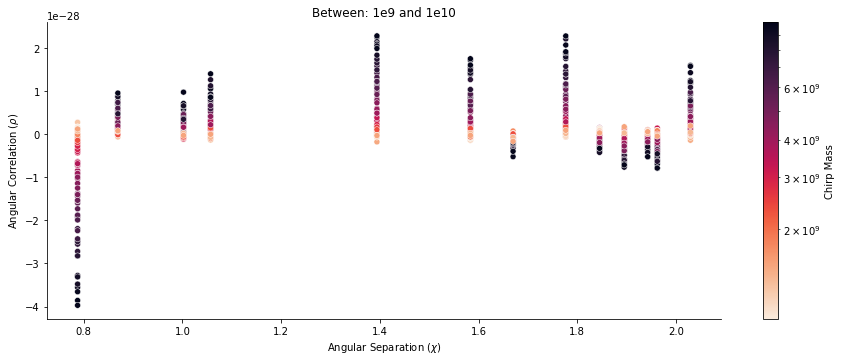

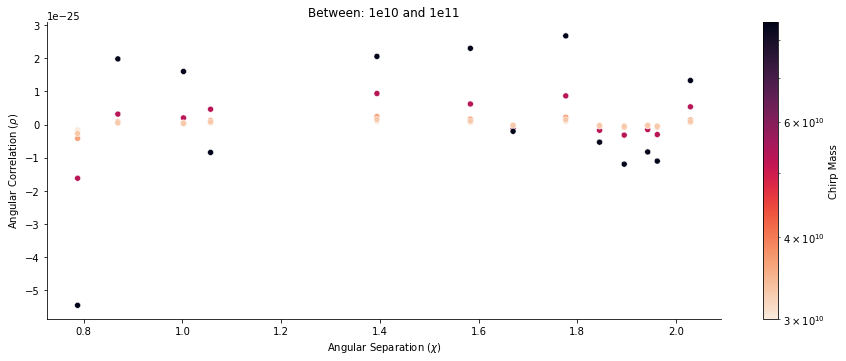

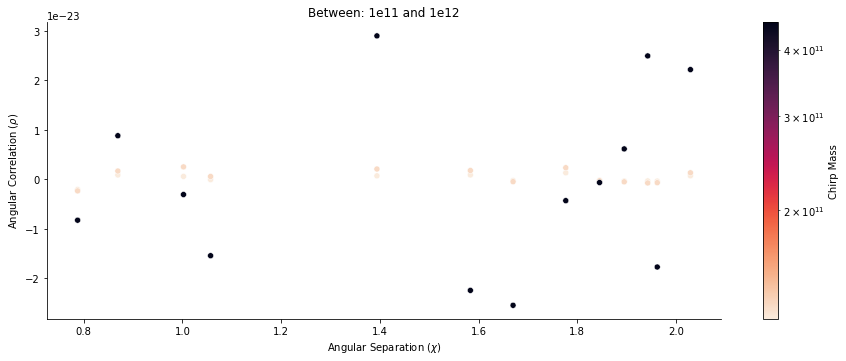

In [105]:
i=5
while i < 12:
    i = i+1
    using = mass_ave_df[mass_ave_df["mass"] < 10**i]
    using = using[using["mass"] > 10**(i-1)]
    
    g = sns.relplot(data=using, x='xi', y="rho", hue='mass', aspect=2.5,legend=False,palette="rocket_r")
    #g.set(yscale="log")
    #norm = plt.colors.LogNorm(mass_df["mass"].min(), mass_df["mass"].max())
    sm = plt.cm.ScalarMappable(cmap="rocket_r",norm=colors.LogNorm(using["mass"].min(), using["mass"].max()))
    sm.set_array([])
    #g.get_legend().remove()
    cbar = g.figure.colorbar(sm)
    cbar.set_label("Chirp Mass")
    g.set_ylabels(r"Angular Correlation ($\rho$)")
    g.set_xlabels(r"Angular Separation ($\chi$)")
    #plt.plot(using.rho.median()*HandD(np.arange(0.05,np.pi,.05)))
    plt.title("Between: 1e{} and 1e{}".format(i-1,i))

In [62]:
mass_df_rescaled = mass_df
mass_df_rescaled["rho"] =+1e-21

In [63]:
mass_df_rescaled

,xi,rho,sig,mass
0,0.155869,1.000000e-21,2.665323e-29,3400000
1,0.182969,1.000000e-21,2.793304e-29,3400000
2,0.200630,1.000000e-21,2.665408e-29,3400000
3,0.209017,1.000000e-21,2.664567e-29,3400000
4,0.213037,1.000000e-21,2.664641e-29,3400000
...,...,...,...,...
418699,2.937913,1.000000e-21,2.875795e-29,51000000
418700,2.977068,1.000000e-21,2.710320e-29,51000000
418701,2.981286,1.000000e-21,2.664601e-29,51000000
418702,3.011413,1.000000e-21,2.664728e-29,51000000


In [56]:
mass_df["rho"] + mass_df["rho"].mean()

0         3.043786e-28
1         2.683746e-28
2         2.512172e-28
3         2.381695e-28
4         2.234385e-28
              ...     
418699    2.237580e-28
418700    2.730086e-28
418701    2.066773e-28
418702    2.630362e-28
418703    2.539677e-28
Name: rho, Length: 418704, dtype: float64

In [76]:
mass_ave_df[mass_ave_df.mass<1e7 and mass_ave_df.mass>1e5]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [198]:
mass_ave_df

,xi,rho,sig,mass
12,0.787633,5.778445e-30,3.850608e-30,3400000
11,0.869195,3.576208e-30,4.216042e-30,3400000
10,1.002195,4.626833e-31,4.214974e-30,3400000
9,1.057047,4.184958e-30,4.215662e-30,3400000
8,1.394091,1.738045e-30,4.214898e-30,3400000
...,...,...,...,...
3,1.845104,6.257868e-30,4.222205e-30,51000000
5,1.895109,4.447366e-30,4.249344e-30,51000000
4,1.942647,2.320235e-30,4.218529e-30,51000000
6,1.962052,2.311609e-30,4.254359e-30,51000000


In [202]:
normed_ave_rho = mass_ave_df.rho - mass_ave_df.rho.mean()

In [204]:
normed_ave = mass_ave_df
normed_ave["rho"] = normed_ave_rho

In [208]:
normed_ave

,xi,rho,sig,mass
0,0.787633,-2.628156e-28,3.850608e-30,3400000
1,0.869195,-2.650178e-28,4.216042e-30,3400000
2,1.002195,-2.681313e-28,4.214974e-30,3400000
3,1.057047,-2.644090e-28,4.215662e-30,3400000
4,1.394091,-2.668560e-28,4.214898e-30,3400000
...,...,...,...,...
10304,1.845104,-2.623361e-28,4.222205e-30,51000000
10305,1.895109,-2.641466e-28,4.249344e-30,51000000
10306,1.942647,-2.662738e-28,4.218529e-30,51000000
10307,1.962052,-2.662824e-28,4.254359e-30,51000000


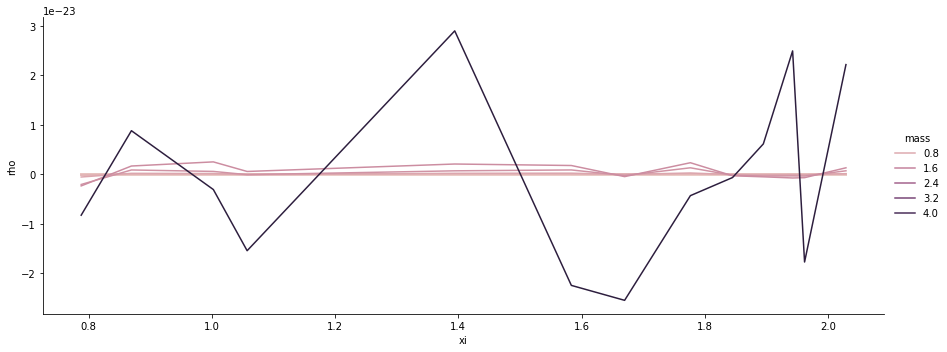

In [201]:
g = sns.relplot(data=mass_ave_df, x='xi', y='rho', hue='mass', kind="line",aspect=2.5)
#g.set(yscale="log")

plt.show()

In [159]:
mass_ave_df

,xi,rho,sig,mass
0,1.696671,4.215745e-30,3.780409e-30,3400000
1,1.588001,7.766780e-31,3.903367e-30,3400000
2,1.848030,4.083718e-31,3.701269e-30,3400000
3,1.850591,-2.441948e-30,3.701191e-30,3400000
4,2.041658,2.888102e-30,3.737610e-30,3400000
...,...,...,...,...
7925,1.954039,-1.886996e-30,3.722643e-30,51000000
7926,1.443073,-1.441608e-30,3.696214e-30,51000000
7927,1.089980,5.158729e-30,3.697183e-30,51000000
7928,0.924757,4.302172e-31,3.696794e-30,51000000


/tmp/ipykernel_13754/4203283230.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


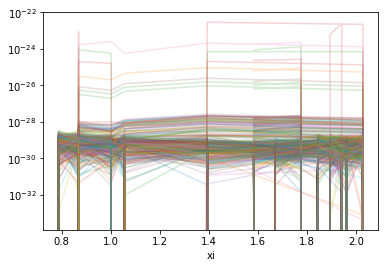

In [168]:
hd_df = []
hdave_df = []

fig, ax = plt.subplots()

for result in glob.glob(datadirdir+"/mass*/data*"):
    dftemp = pd.read_pickle(result)
    mass = result.split("/")
    mass = int(mass[-2].split("_")[-1])
    dftemp["mass"] = [mass]*len(dftemp)
    
    dftemp = dftemp.sort_values("xi")

    avexi, averho, avesig = plotBinnedCrossCor(dftemp.xi,dftemp.rho,dftemp.sig)
    avedata = [avexi,averho,avesig]
    avedata = np.array(avedata)
    
    moving_ave = pd.DataFrame(avedata.T,columns=["xi","rho","sig"])
    moving_ave["mass"] = [mass]*len(moving_ave)
    moving_ave.plot("xi","rho",alpha=0.2,ax=ax,legend=False,logy=True)
    
#mass_df = pd.concat(master_df)
#mass_ave_df = pd.concat(movave_df)

fig.show()